In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data_skor_per_desa.csv")

In [3]:
df.head()

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase balita sering diperiksa di Posyandu,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit
0,Balauring,20.000000,100.000000,76.666667,80.000000,10.350000,0.496667,9.300000,66.666667,11.111111,0.000000,66.666667,10.000000,100.000000,70.000000,33.333333
1,Benihading,66.666667,100.000000,0.000000,50.000000,1.156233,0.592959,0.000000,0.000000,7.407407,0.000000,100.000000,20.000000,100.000000,83.333333,63.333333
2,Bour,21.428571,96.428571,0.000000,57.142857,0.720125,2.130036,0.821429,50.000000,83.333333,41.666667,92.857143,14.285714,100.000000,85.714286,35.714286
3,Dikesare,6.666667,100.000000,0.000000,66.666667,0.205933,20.127110,7.666667,0.000000,0.000000,0.000000,76.666667,3.333333,95.454545,76.666667,20.000000
4,Duawutun,20.000000,100.000000,100.000000,80.000000,0.928333,5.889333,1.233333,0.000000,0.000000,0.000000,66.666667,0.000000,100.000000,50.000000,10.000000


In [4]:
df.drop(columns=['Persentase balita sering diperiksa di Posyandu'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Desa                                                    29 non-null     object 
 1   Persentase gaji di atas UMK                             29 non-null     float64
 2   Persentase sumber listrik PLN                           29 non-null     float64
 3   Persentase air bersih PDAM                              29 non-null     float64
 4   Persentase bangunan rumah bukan "rumah kecil"           29 non-null     float64
 5   Rata-rata luas lahan (Ha)                               29 non-null     float64
 6   Rata-rata produksi pertanian (ton)                      29 non-null     float64
 7   Rata-rata tangkapan ikan (Kg)                           29 non-null     float64
 8   Persentase petani membeli pupuk           

In [6]:
df.isna().sum()

Desa                                                      0
Persentase gaji di atas UMK                               0
Persentase sumber listrik PLN                             0
Persentase air bersih PDAM                                0
Persentase bangunan rumah bukan "rumah kecil"             0
Rata-rata luas lahan (Ha)                                 0
Rata-rata produksi pertanian (ton)                        0
Rata-rata tangkapan ikan (Kg)                             0
Persentase petani membeli pupuk                           0
Persentase petani membeli pestisida                       0
Persentase petani menyewa alat pertanian                  0
Persentase kepemilikan ternak                             0
Persentase pembelian obat                                 0
Persentase mendapat bantuan dari pemerintah               0
Persentase terdapat anggota keluarga yang sering sakit    0
dtype: int64

## analisis distribusi

In [7]:
#memisahkan data numerik dan kategorik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [8]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Persentase gaji di atas UMK,29.0,23.094844,14.946905,3.333333,10.000000,21.428571,32.258065,66.666667
Persentase sumber listrik PLN,29.0,98.853488,2.390438,90.000000,100.000000,100.000000,100.000000,100.000000
Persentase air bersih PDAM,29.0,47.823508,48.804427,0.000000,0.000000,16.666667,100.000000,100.000000
"Persentase bangunan rumah bukan ""rumah kecil""",29.0,67.276354,14.929311,16.666667,63.333333,66.666667,76.666667,96.551724
Rata-rata luas lahan (Ha),29.0,17.634582,35.684787,0.205933,0.552516,1.061917,10.350000,138.232790
Rata-rata produksi pertanian (ton),29.0,10.875879,15.420498,0.028387,0.496667,2.650610,14.839667,57.655900
Rata-rata tangkapan ikan (Kg),29.0,1.297650,2.203005,0.000000,0.000000,0.433333,1.233333,9.300000
Persentase petani membeli pupuk,29.0,17.371751,30.234160,0.000000,0.000000,0.000000,12.500000,100.000000
Persentase petani membeli pestisida,29.0,30.467098,31.440932,0.000000,0.000000,28.571429,52.173913,100.000000
Persentase petani menyewa alat pertanian,29.0,7.547862,14.553425,0.000000,0.000000,0.000000,10.000000,66.666667


In [9]:
cols = 3
rows = math.ceil(len(numerical_cols) / cols)

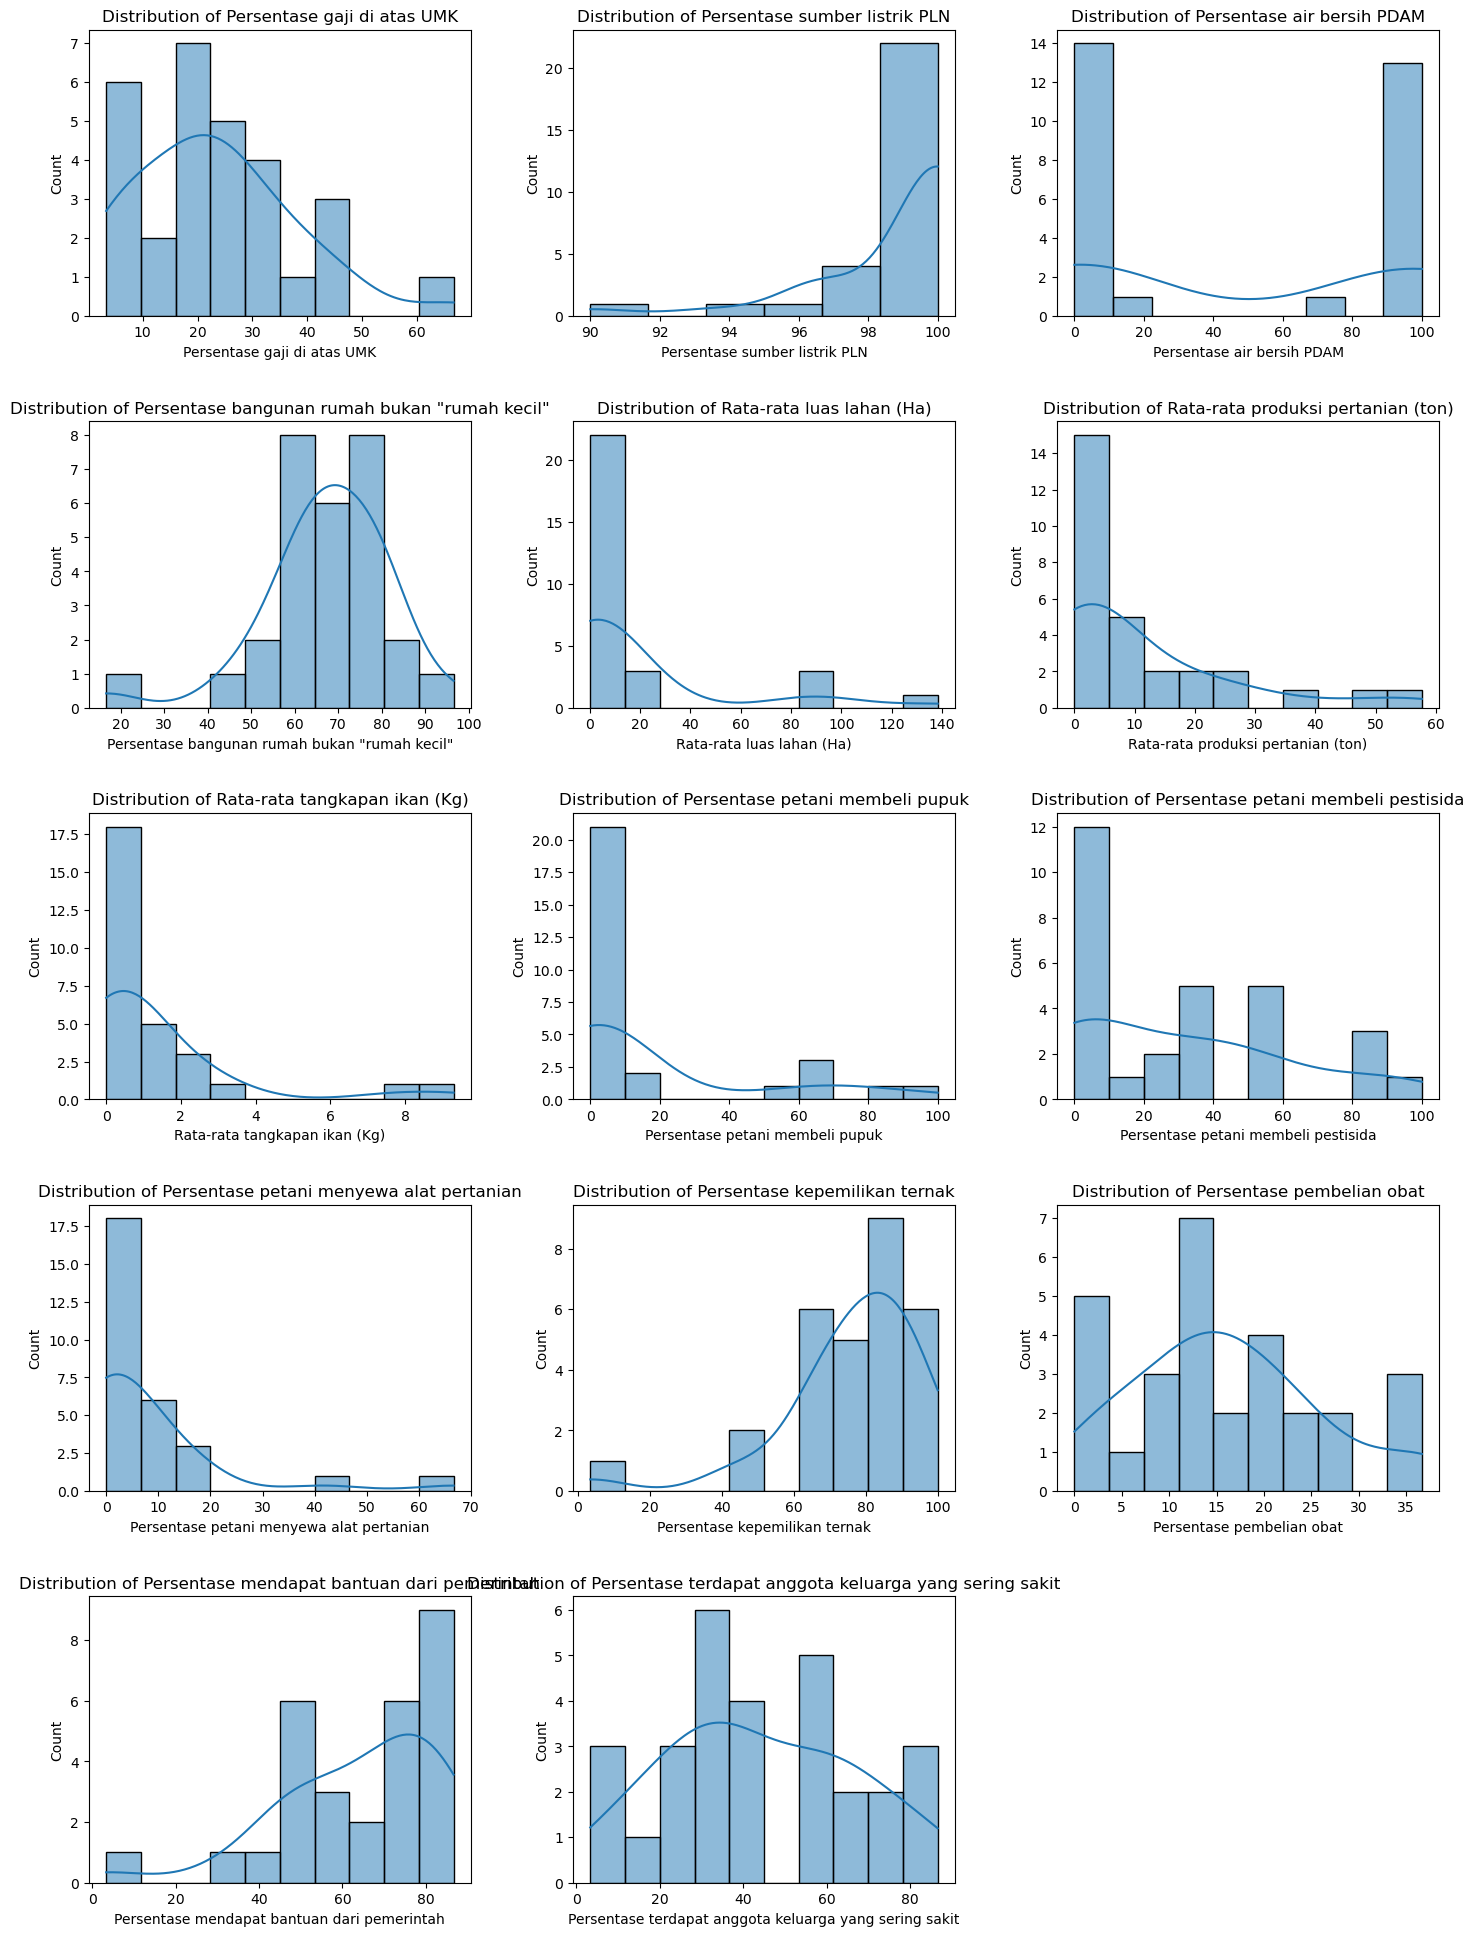

In [10]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=min(10, df[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout(pad=3)
plt.show()

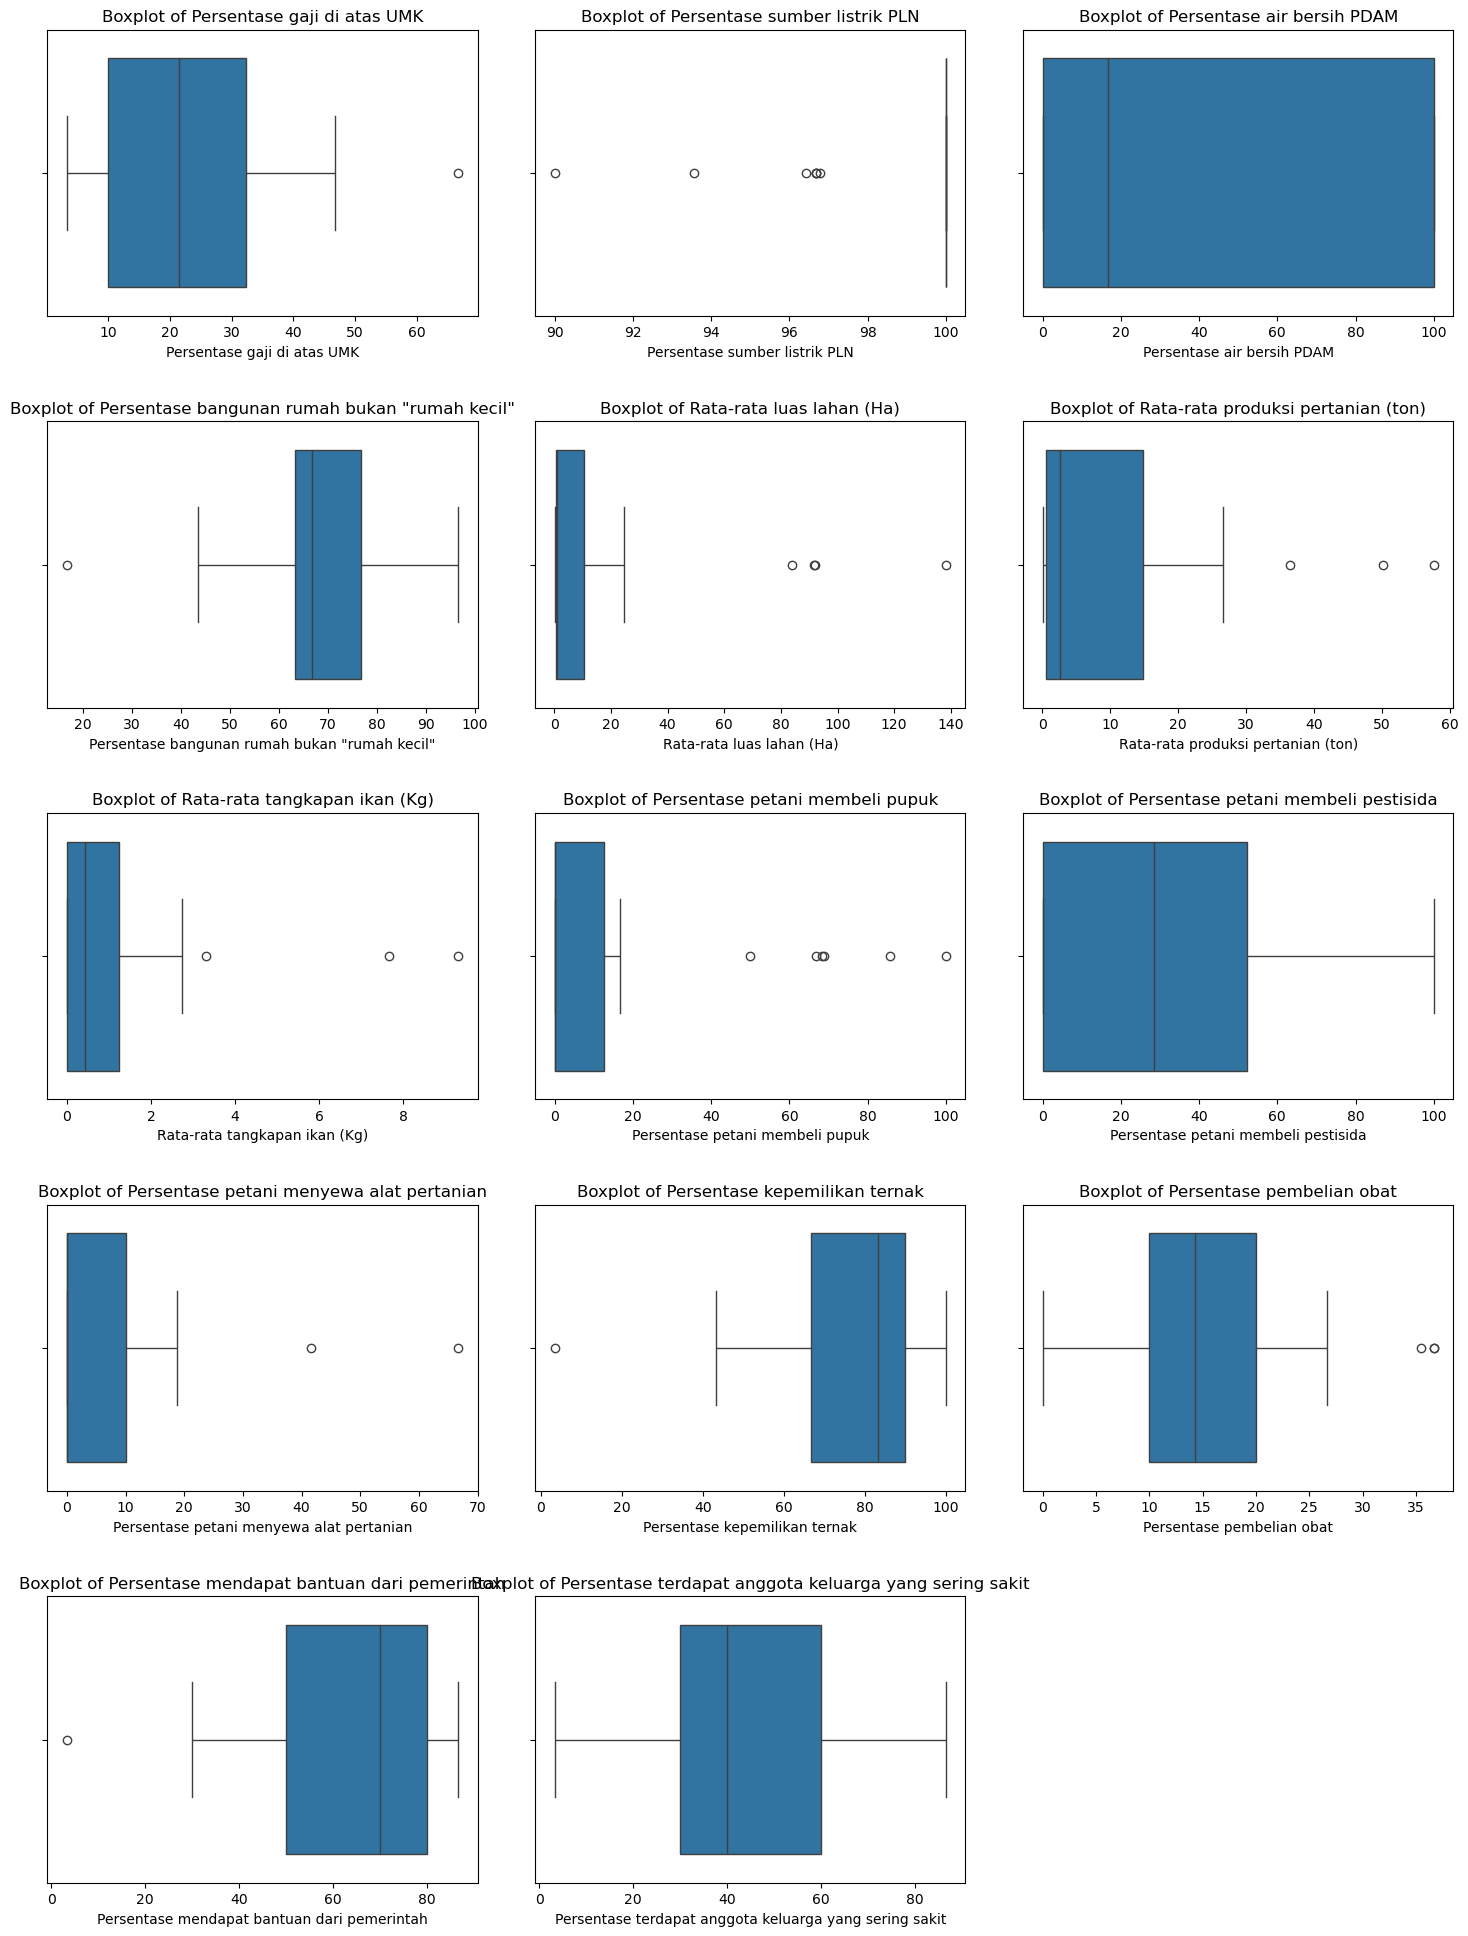

In [11]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

## normalisasi

In [12]:
#Normalisasi
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df_normalized

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit
0,Balauring,0.263158,1.000000,0.766667,0.792806,0.073493,0.008126,1.000000,0.666667,0.111111,0.000000,0.654762,0.272727,0.800000,0.360000
1,Benihading,1.000000,1.000000,0.000000,0.417266,0.006885,0.009797,0.000000,0.000000,0.074074,0.000000,1.000000,0.545455,0.960000,0.720000
2,Bour,0.285714,0.642857,0.000000,0.506680,0.003725,0.036470,0.088326,0.500000,0.833333,0.625000,0.926020,0.389610,0.988571,0.388571
3,Dikesare,0.052632,1.000000,0.000000,0.625899,0.000000,0.348770,0.824373,0.000000,0.000000,0.000000,0.758333,0.090909,0.880000,0.200000
4,Duawutun,0.263158,1.000000,1.000000,0.792806,0.005234,0.101704,0.132616,0.000000,0.000000,0.000000,0.654762,0.000000,0.560000,0.080000
5,Dulitukan,0.315789,1.000000,0.166667,0.584173,0.005938,0.030206,0.032258,0.000000,0.000000,0.000000,0.930952,1.000000,0.720000,0.400000
6,Hoelea I,0.210526,1.000000,0.000000,0.667626,0.001955,0.010773,0.046595,0.857143,0.571429,0.000000,0.930952,0.272727,1.000000,0.320000
7,Ile Kimok,0.263158,1.000000,0.000000,0.751079,0.172072,0.124659,0.000000,0.071429,0.535714,0.000000,0.965476,0.090909,0.920000,1.000000
8,Kalikur,0.684211,1.000000,0.000000,0.667626,0.121188,0.257018,0.293907,1.000000,1.000000,0.166667,0.413095,0.545455,0.520000,0.160000
9,Katakeja,0.456706,0.677419,1.000000,0.679740,0.000901,0.000000,0.000000,0.000000,0.333333,1.000000,0.832949,0.967742,0.695484,0.424516


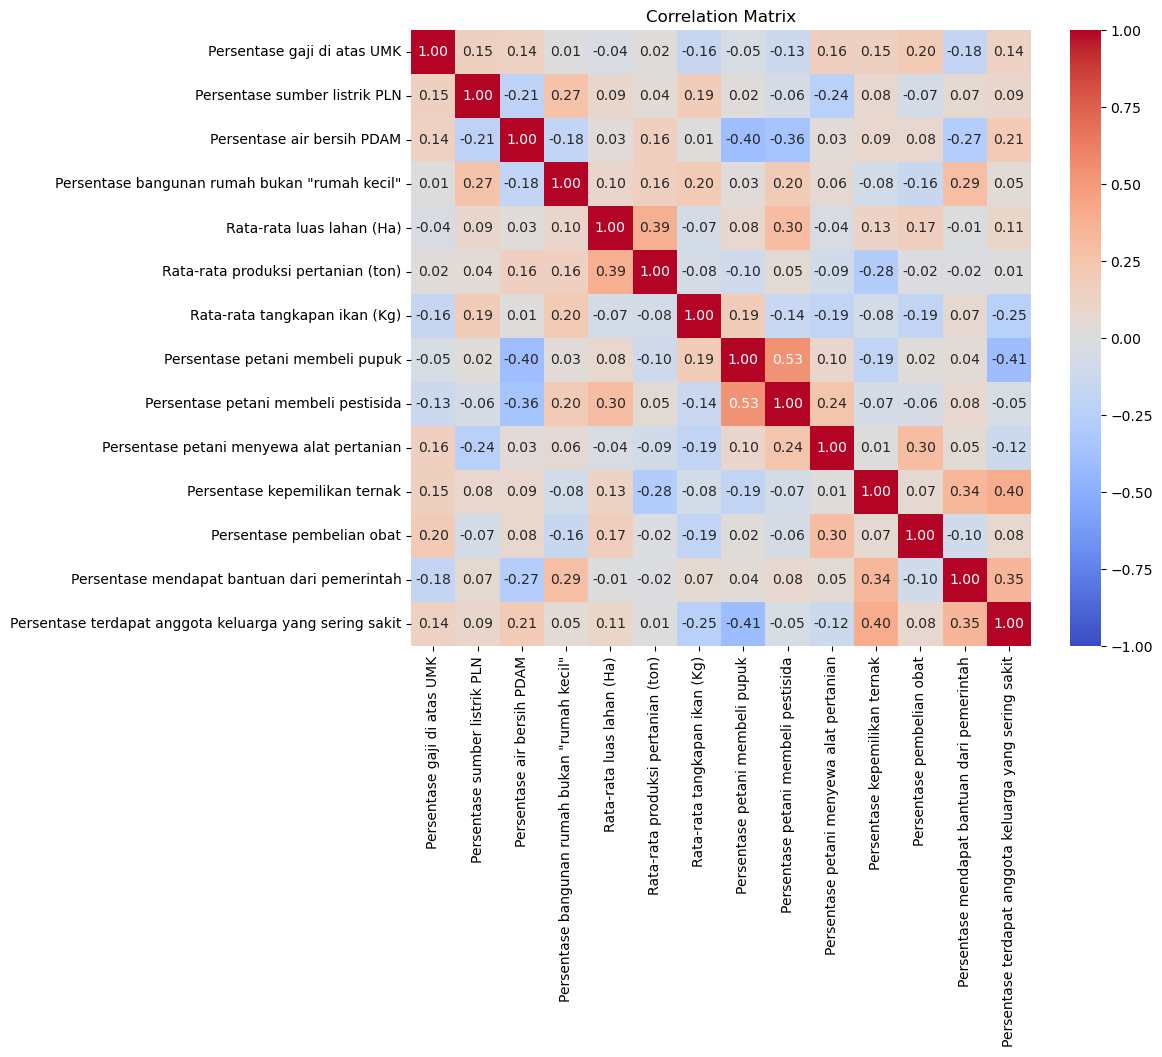

In [14]:
plt.figure(figsize=(10,8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

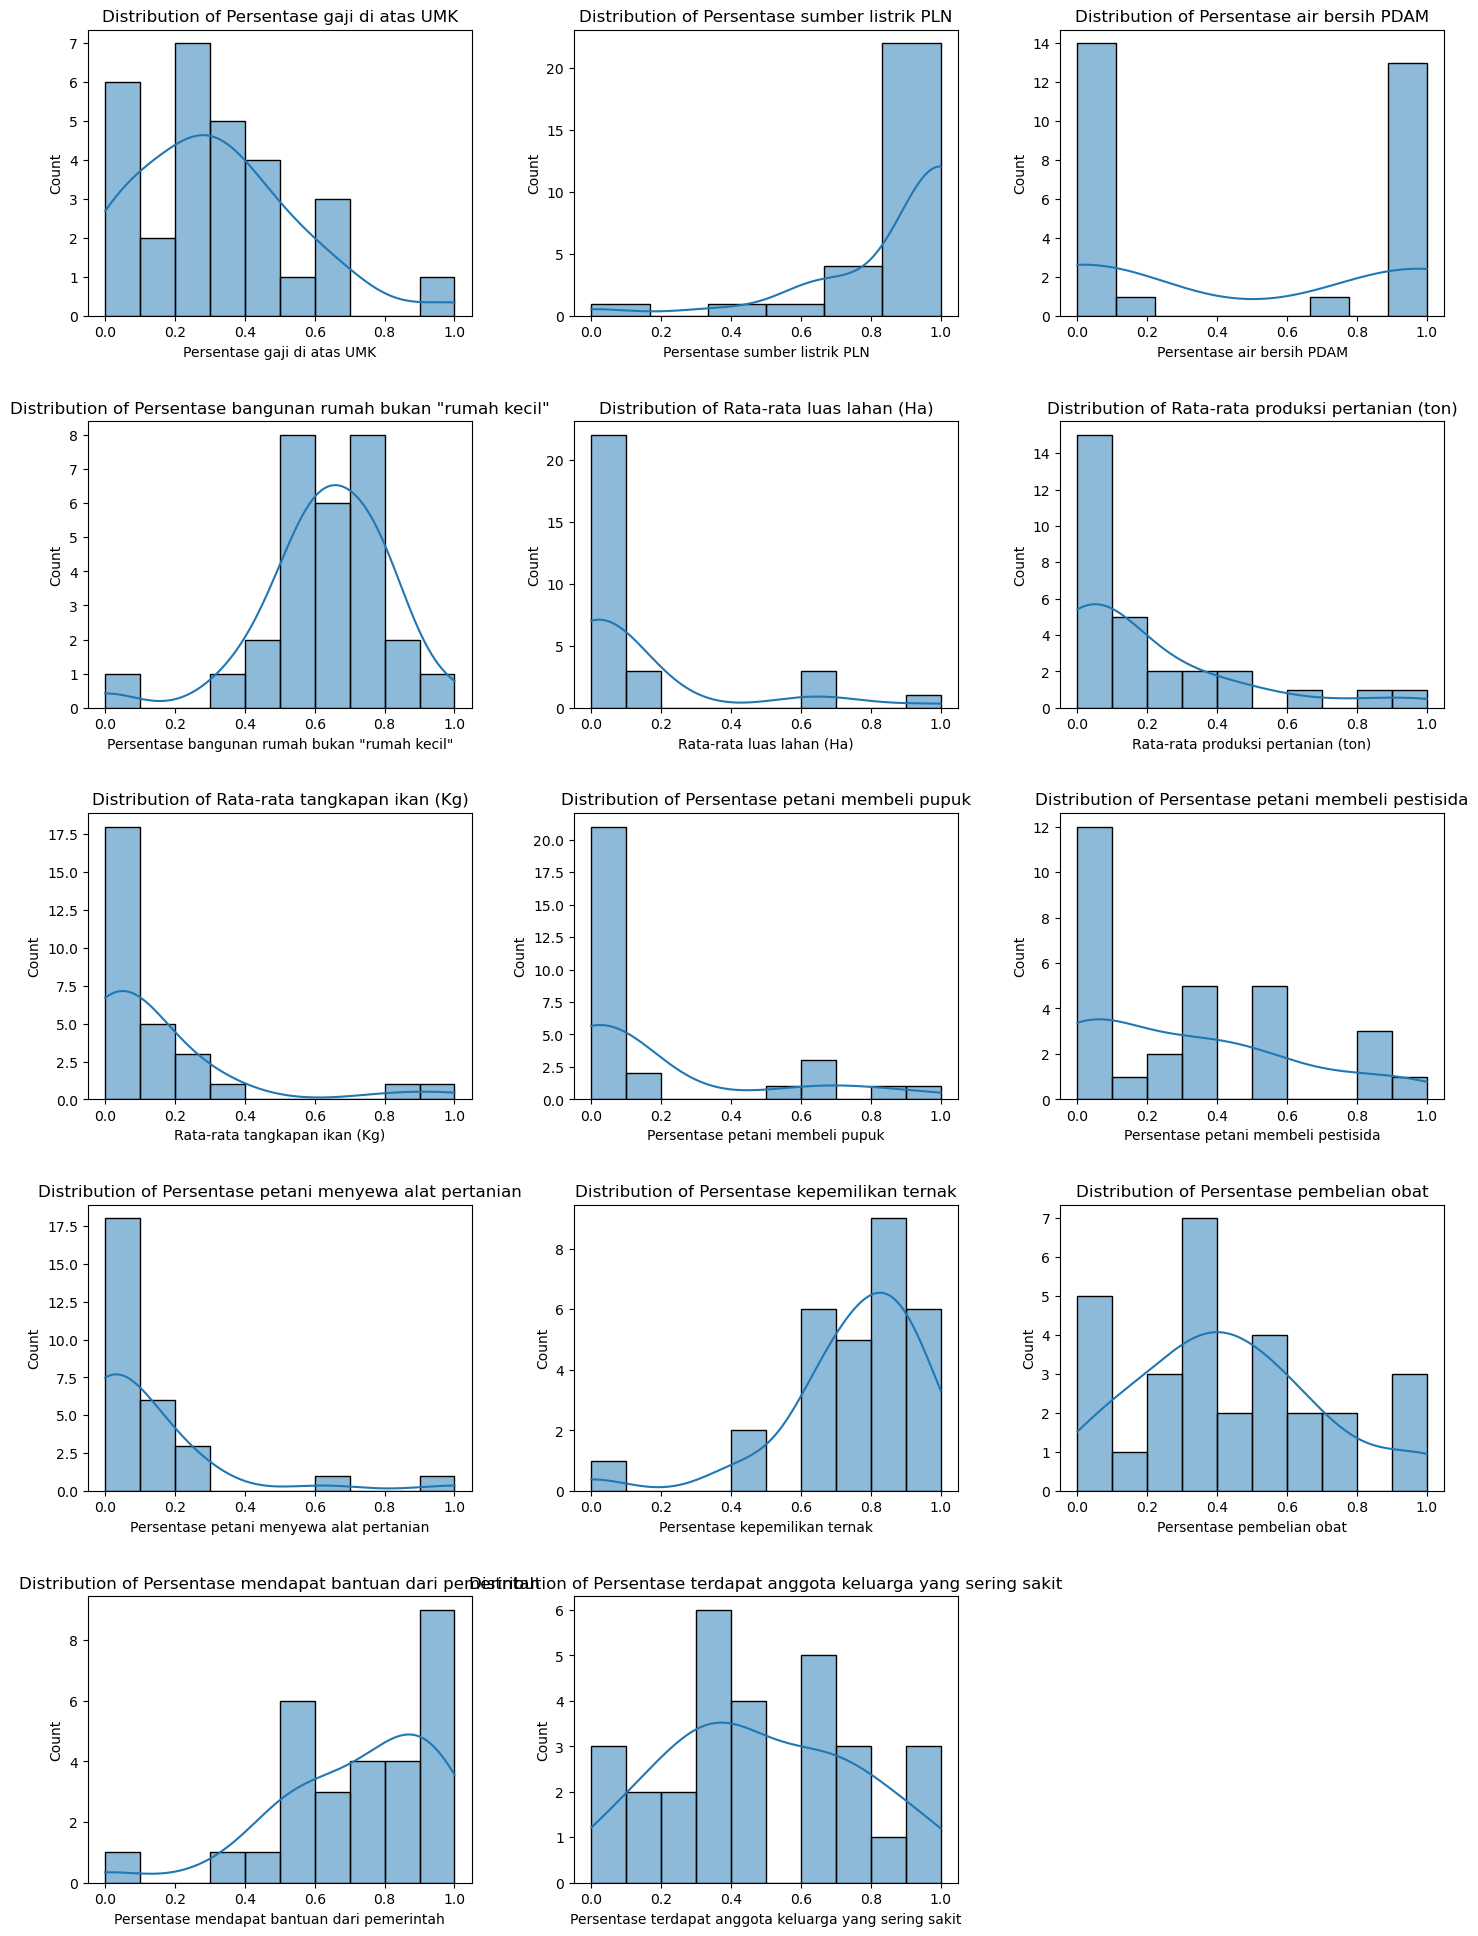

In [15]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], kde=True, bins=min(10, df_normalized[col].nunique()), ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(pad=3); plt.show()

In [16]:
df_normalized.to_csv("df_normalized.csv", index=False)

## pembangunan model clustering

In [55]:
df_plot = df.copy()

### k means

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

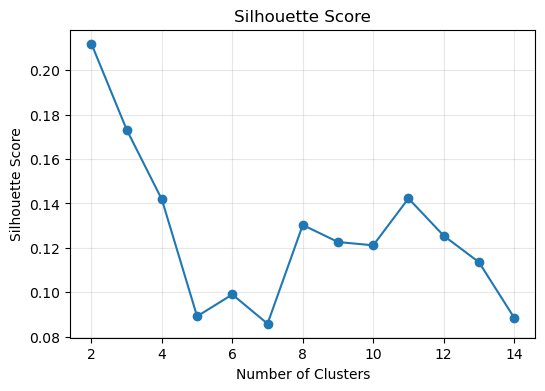

In [48]:
df_km = df_normalized.select_dtypes(include=['number']).copy()

silhouette_scores = []
for k in range(2, 15):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(df_km)
    silhouette_scores.append(silhouette_score(df_km, km.labels_))

plt.figure(figsize=(6,4))
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=.3)
plt.show()

In [60]:
# melatih model

model_kmeans = KMeans (
    n_clusters=4,
    init='k-means++',
    random_state=42
)
model_kmeans.fit(df_km)
silhouette_score(df_km, model_kmeans.labels_)

C:\Users\halid\anaconda3\envs\main-ds\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.14180109688635928

In [63]:
df_plot = df_plot.loc[df_km.index]
df_plot["KM_Cluster"] = pd.Categorical(model_kmeans.labels_, categories=[0,1,2,3])

In [64]:
df_plot

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit,HC_Cluster,KM_Cluster
0,Balauring,20.000000,100.000000,76.666667,80.000000,10.350000,0.496667,9.300000,66.666667,11.111111,0.000000,66.666667,10.000000,70.000000,33.333333,4,2
1,Benihading,66.666667,100.000000,0.000000,50.000000,1.156233,0.592959,0.000000,0.000000,7.407407,0.000000,100.000000,20.000000,83.333333,63.333333,5,1
2,Bour,21.428571,96.428571,0.000000,57.142857,0.720125,2.130036,0.821429,50.000000,83.333333,41.666667,92.857143,14.285714,85.714286,35.714286,1,1
3,Dikesare,6.666667,100.000000,0.000000,66.666667,0.205933,20.127110,7.666667,0.000000,0.000000,0.000000,76.666667,3.333333,76.666667,20.000000,4,1
4,Duawutun,20.000000,100.000000,100.000000,80.000000,0.928333,5.889333,1.233333,0.000000,0.000000,0.000000,66.666667,0.000000,50.000000,10.000000,4,2
5,Dulitukan,23.333333,100.000000,16.666667,63.333333,1.025583,1.769063,0.300000,0.000000,0.000000,0.000000,93.333333,36.666667,63.333333,36.666667,5,1
6,Hoelea I,16.666667,100.000000,0.000000,70.000000,0.475833,0.649200,0.433333,85.714286,57.142857,0.000000,93.333333,10.000000,86.666667,30.000000,1,1
7,Ile Kimok,20.000000,100.000000,0.000000,76.666667,23.956500,7.212167,0.000000,7.142857,53.571429,0.000000,96.666667,3.333333,80.000000,86.666667,5,1
8,Kalikur,46.666667,100.000000,0.000000,70.000000,16.933167,14.839667,2.733333,100.000000,100.000000,11.111111,43.333333,20.000000,46.666667,16.666667,1,1
9,Katakeja,32.258065,96.774194,100.000000,70.967742,0.330323,0.028387,0.000000,0.000000,33.333333,66.666667,83.870968,35.483871,61.290323,38.709677,2,3


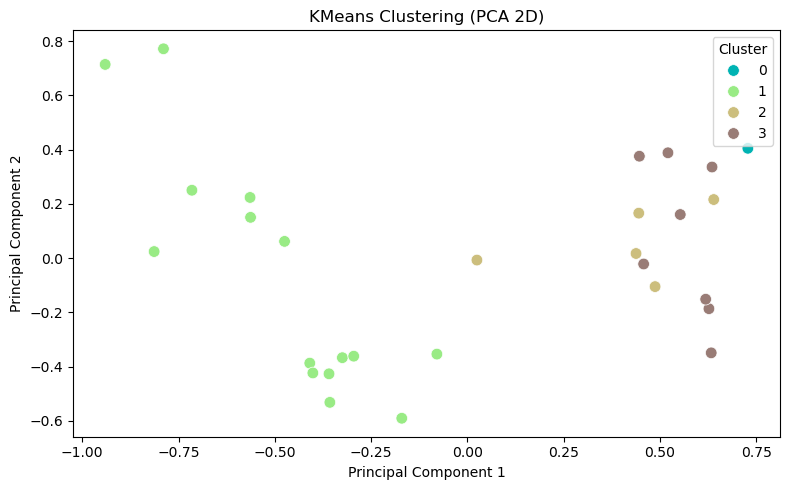

In [65]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_km)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_plot["KM_Cluster"],
                palette="terrain", s=70, edgecolor="white", linewidth=.5)
plt.title('KMeans Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', frameon=True)
plt.tight_layout()
plt.show()

C:\Users\halid\AppData\Local\Temp\ipykernel_12604\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_12604\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_12604\2113548834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
C:\Users\h

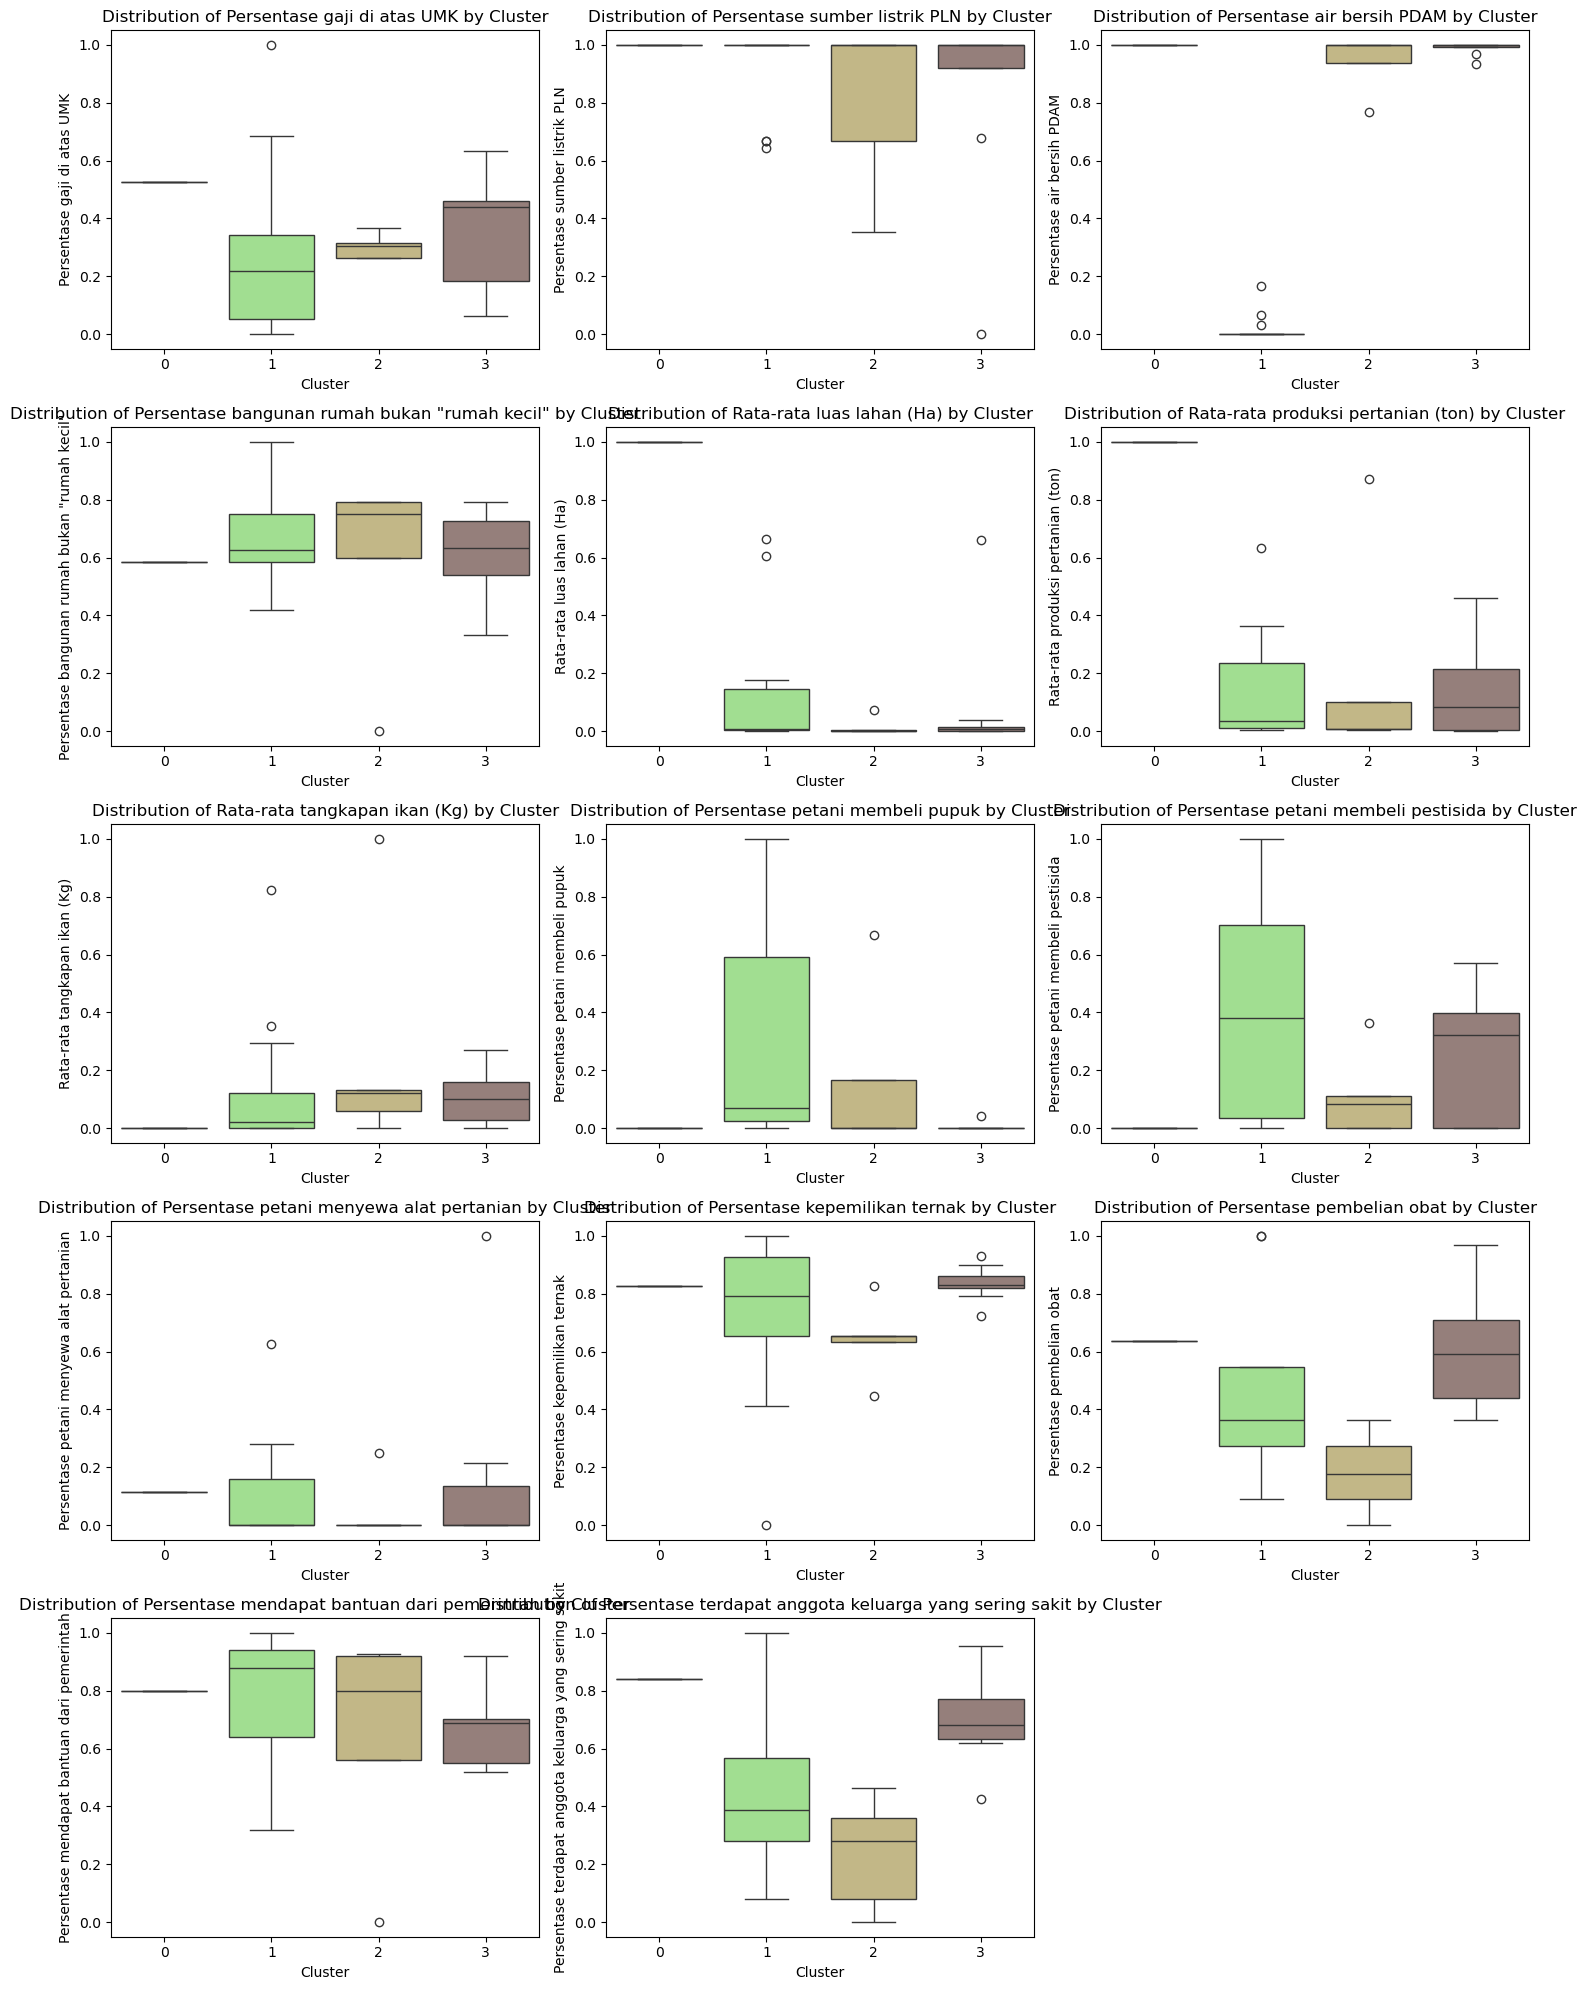

In [66]:
# Boxplot by Cluster

fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
tmp_norm = df_normalized.copy()
tmp_norm["Cluster"] = df_plot["KM_Cluster"]  # sejajarkan label
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Cluster", y=col, data=tmp_norm, palette="terrain", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Cluster")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout(); plt.show()

### hierarchical clustering

In [17]:
# Simpan nama desa terpisah
desa = df_normalized["Desa"]

# Ambil hanya variabel numerik
X = df_normalized.drop("Desa", axis=1)

# Tangani missing value (misalnya isi dengan median)
X = X.fillna(X.median())

# (opsional) Scaling → lebih adil antar indikator
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

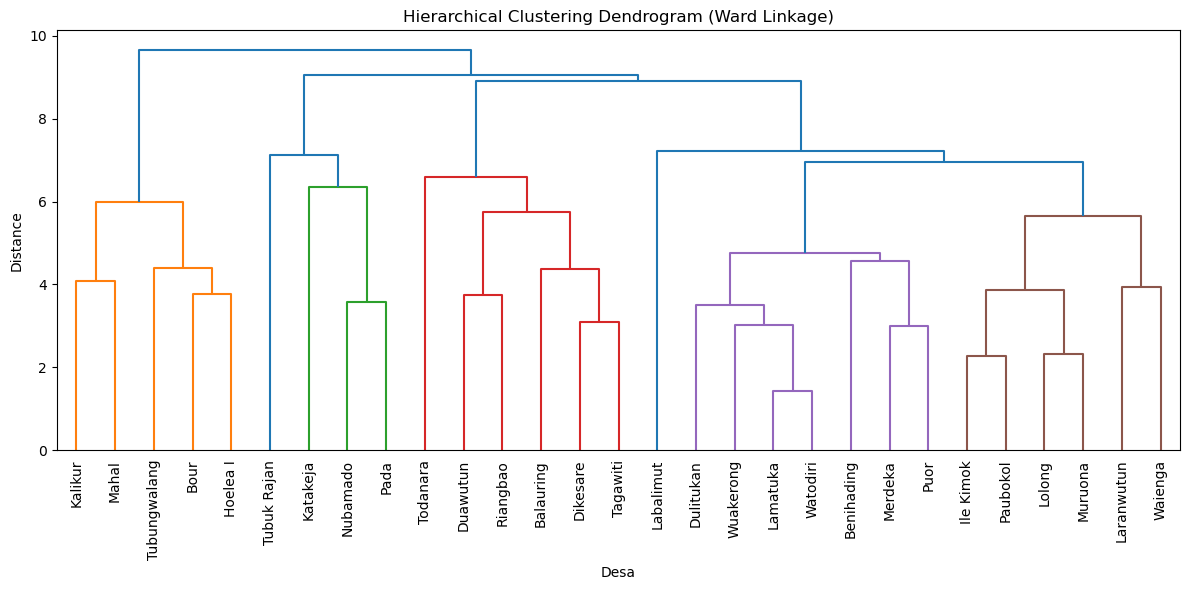

In [18]:
# linkage: 'ward' cocok untuk data numerik
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, labels=desa.values, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Desa")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [20]:
hc_labels = fcluster(Z, 6, criterion="maxclust")
df_plot["HC_Cluster"] = pd.Categorical(hc_labels)

In [21]:
df_plot

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit,HC_Cluster
0,Balauring,20.000000,100.000000,76.666667,80.000000,10.350000,0.496667,9.300000,66.666667,11.111111,0.000000,66.666667,10.000000,70.000000,33.333333,4
1,Benihading,66.666667,100.000000,0.000000,50.000000,1.156233,0.592959,0.000000,0.000000,7.407407,0.000000,100.000000,20.000000,83.333333,63.333333,5
2,Bour,21.428571,96.428571,0.000000,57.142857,0.720125,2.130036,0.821429,50.000000,83.333333,41.666667,92.857143,14.285714,85.714286,35.714286,1
3,Dikesare,6.666667,100.000000,0.000000,66.666667,0.205933,20.127110,7.666667,0.000000,0.000000,0.000000,76.666667,3.333333,76.666667,20.000000,4
4,Duawutun,20.000000,100.000000,100.000000,80.000000,0.928333,5.889333,1.233333,0.000000,0.000000,0.000000,66.666667,0.000000,50.000000,10.000000,4
5,Dulitukan,23.333333,100.000000,16.666667,63.333333,1.025583,1.769063,0.300000,0.000000,0.000000,0.000000,93.333333,36.666667,63.333333,36.666667,5
6,Hoelea I,16.666667,100.000000,0.000000,70.000000,0.475833,0.649200,0.433333,85.714286,57.142857,0.000000,93.333333,10.000000,86.666667,30.000000,1
7,Ile Kimok,20.000000,100.000000,0.000000,76.666667,23.956500,7.212167,0.000000,7.142857,53.571429,0.000000,96.666667,3.333333,80.000000,86.666667,5
8,Kalikur,46.666667,100.000000,0.000000,70.000000,16.933167,14.839667,2.733333,100.000000,100.000000,11.111111,43.333333,20.000000,46.666667,16.666667,1
9,Katakeja,32.258065,96.774194,100.000000,70.967742,0.330323,0.028387,0.000000,0.000000,33.333333,66.666667,83.870968,35.483871,61.290323,38.709677,2


C:\Users\halid\AppData\Local\Temp\ipykernel_12928\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_12928\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\Users\halid\AppData\Local\Temp\ipykernel_12928\479108820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
C:\User

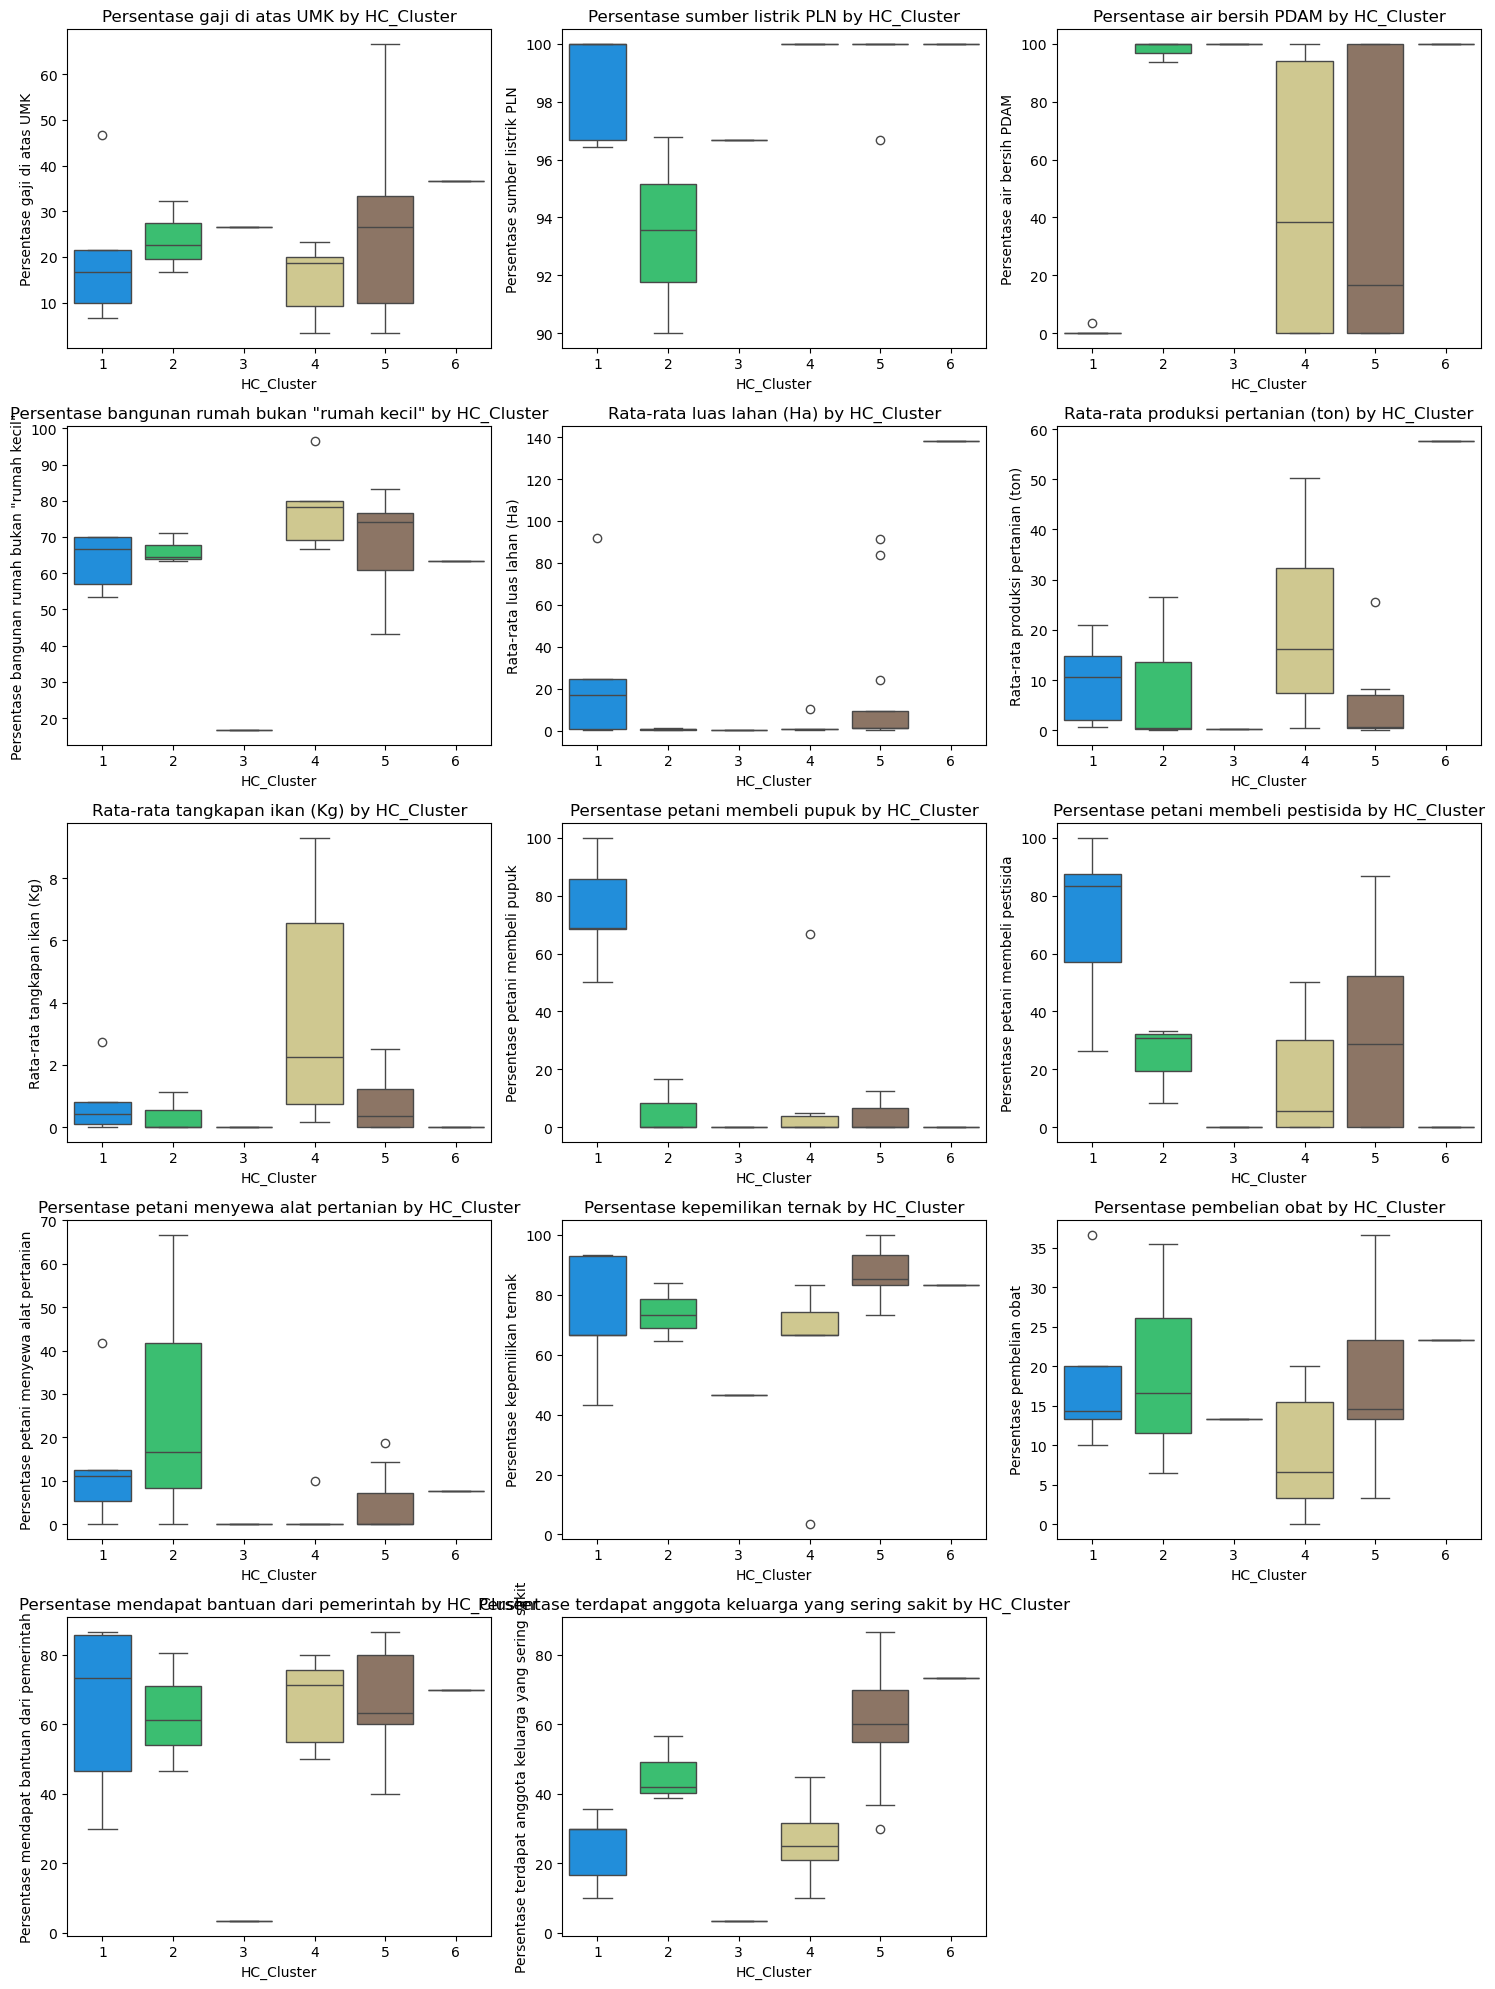

In [22]:
fig, axes = plt.subplots(rows, cols, figsize=(15, rows*4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="HC_Cluster", y=col, data=df_plot, palette="terrain", ax=axes[i])
    axes[i].set_title(f"{col} by HC_Cluster")
for j in range(i+1, len(axes)): fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

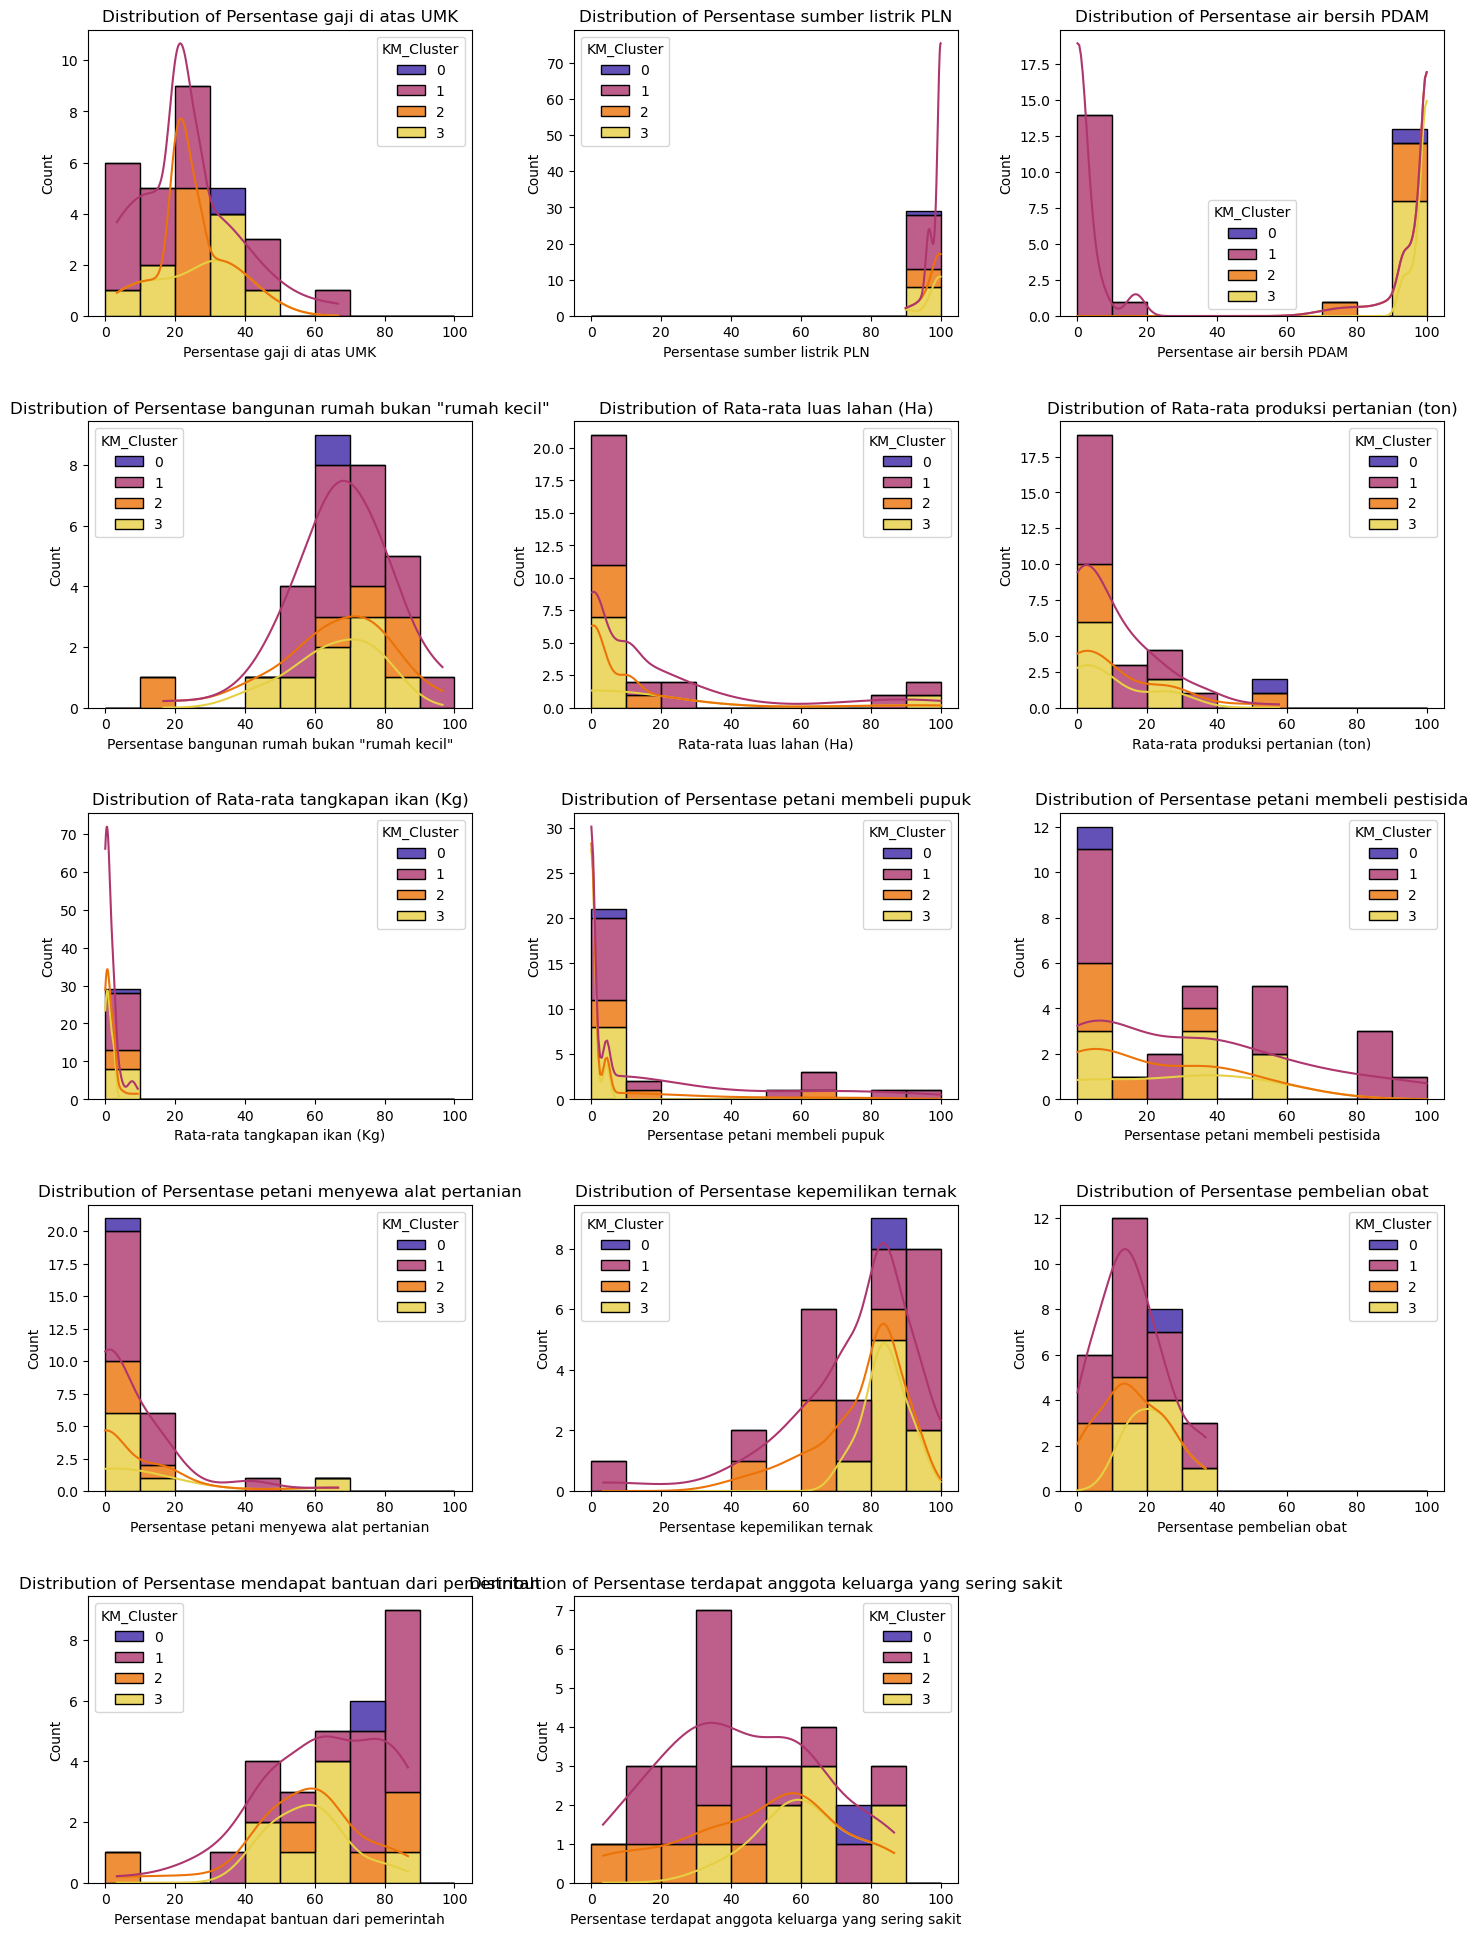

In [77]:
# 2) Palet warna terang biar konsisten
palette = {0: "#A6CEE3", 1: "#FDBF6F", 2: "#B2DF8A", 3: "#CAB2D6"}

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="KM_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="CMRmap",
        kde=True,
        kde_kws={'clip': (0, 100)},
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

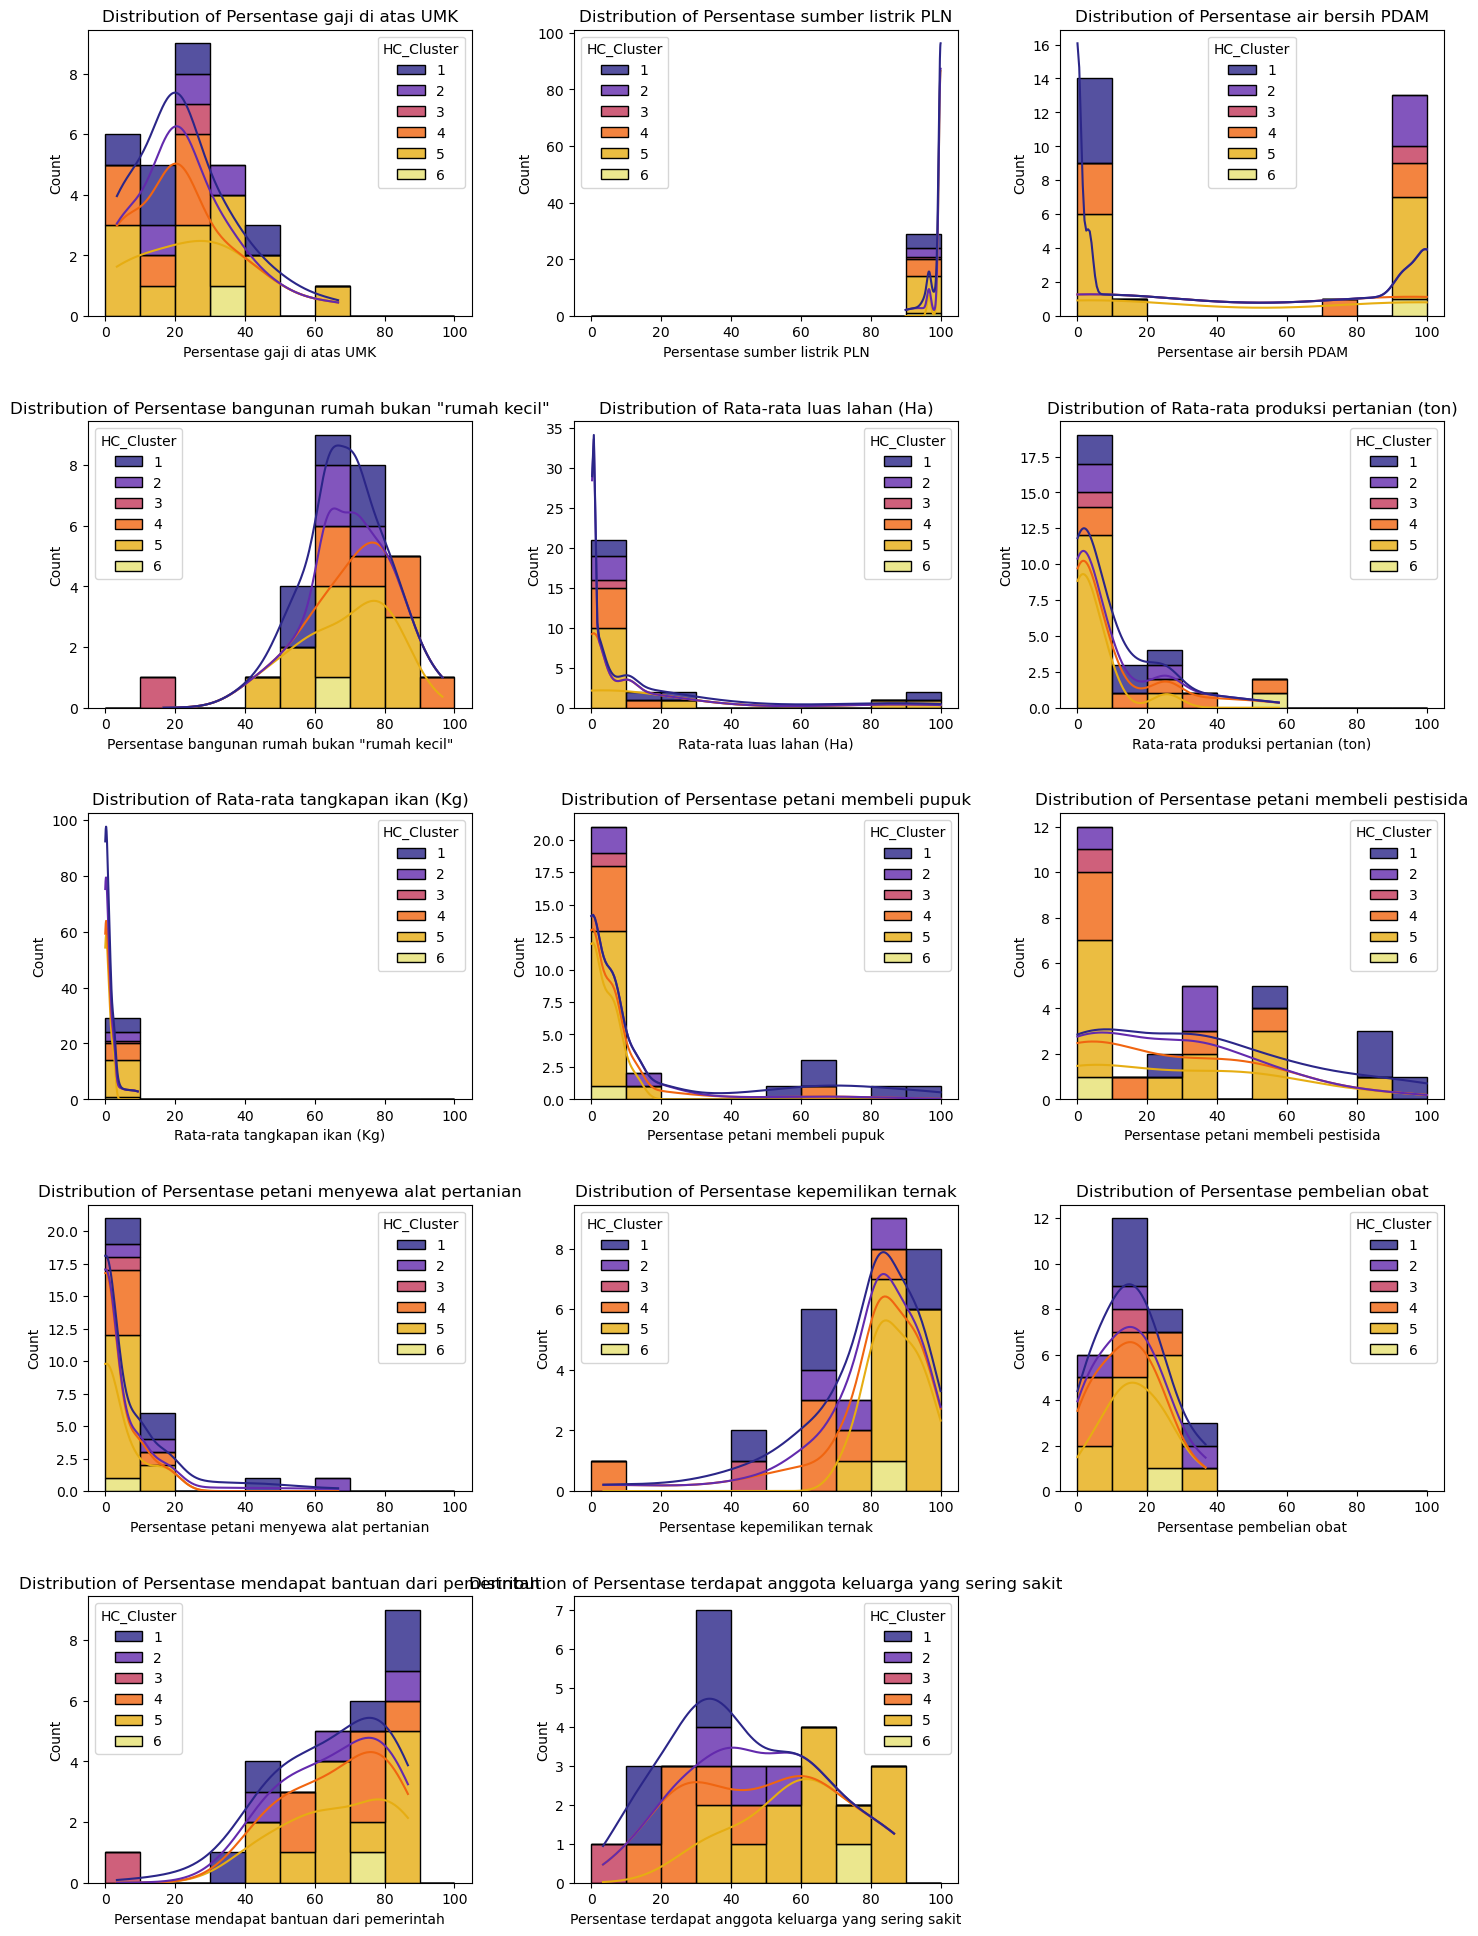

In [25]:
# 2) Palet warna terang biar konsisten
palette = {0: "#A6CEE3", 1: "#FDBF6F", 2: "#B2DF8A", 3: "#CAB2D6"}

# 3) Gambar ulang grid histogram seperti sebelumnya, tapi berwarna per-cluster
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette="CMRmap",
        kde=True,
        kde_kws={'clip': (0, 100)},
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

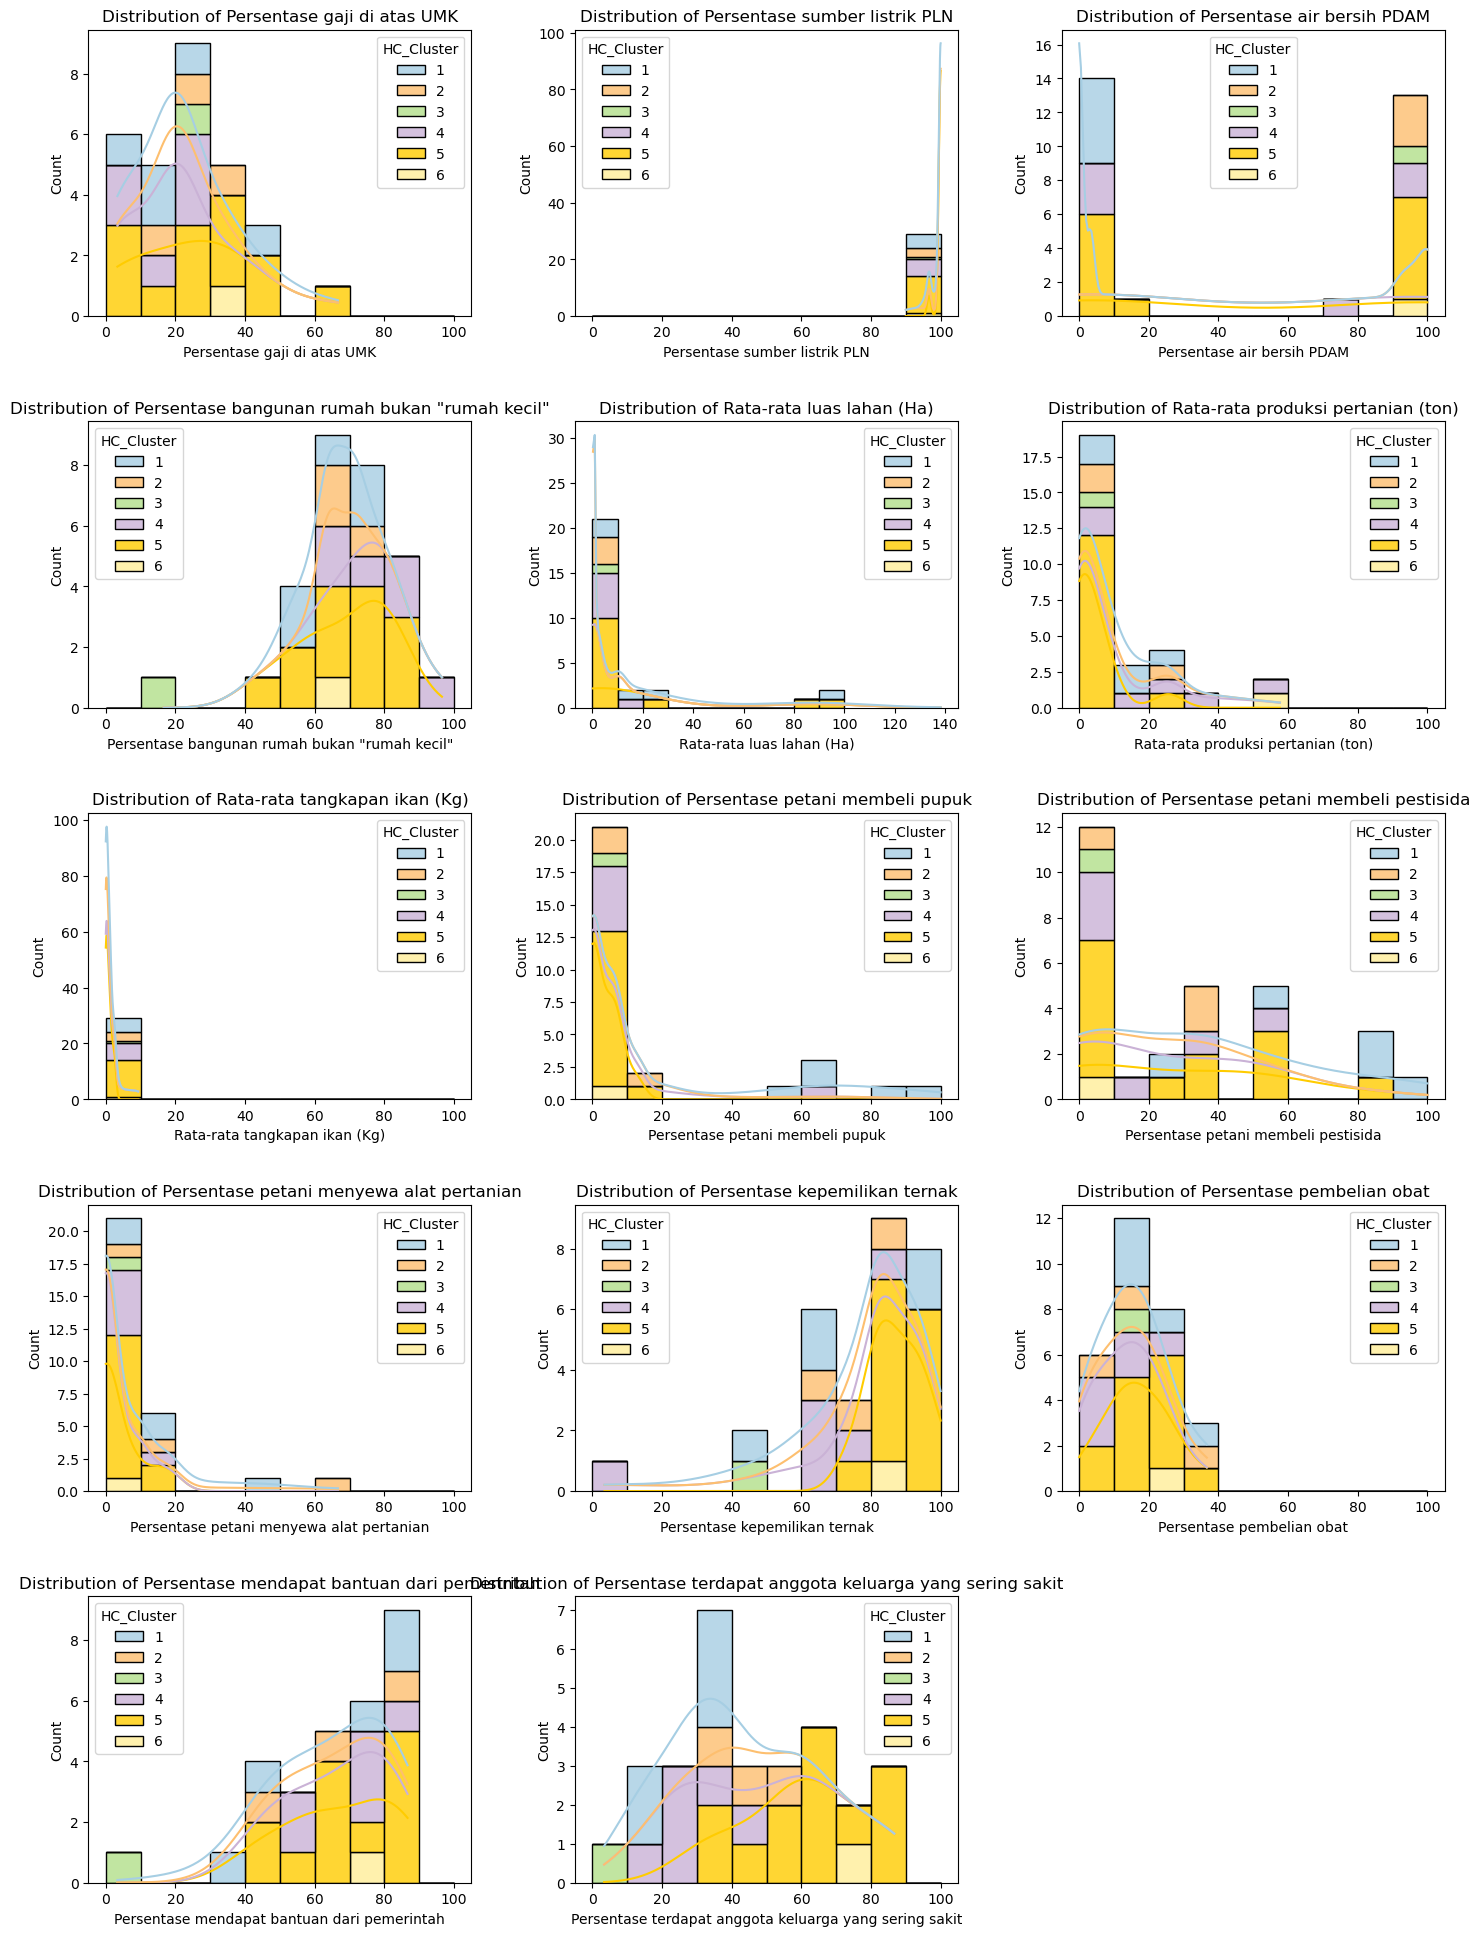

In [30]:
# palet warna terang
palette = {1: "#A6CEE3", 2: "#FDBF6F", 3: "#B2DF8A",
           4: "#CAB2D6", 5: "#FFCC00", 6: "#FFEE99"}

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df_plot,
        x=col,
        hue="HC_Cluster",
        bins=range(0, 110, 10),
        multiple="stack",
        stat="count",
        common_bins=True,
        alpha=0.8,
        palette=palette,   # pakai palet custom
        kde=True,          # biar seaborn yang gambar garis
        kde_kws={'cut': 0},  # <= ini kuncinya, BUKAN clip=(0, 100)
        ax=axes[i]
    )

    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# hapus axis kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

## dbscan

In [71]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=3).fit(X_pca)

In [72]:
df_plot['DB_Cluster'] = db.labels_

In [73]:
df_plot

,Desa,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit,cluster_DB,DB_Cluster
0,Balauring,20.000000,100.000000,76.666667,80.000000,10.350000,0.496667,9.300000,66.666667,11.111111,0.000000,66.666667,10.000000,70.000000,33.333333,-1,-1
1,Benihading,66.666667,100.000000,0.000000,50.000000,1.156233,0.592959,0.000000,0.000000,7.407407,0.000000,100.000000,20.000000,83.333333,63.333333,-1,1
2,Bour,21.428571,96.428571,0.000000,57.142857,0.720125,2.130036,0.821429,50.000000,83.333333,41.666667,92.857143,14.285714,85.714286,35.714286,-1,0
3,Dikesare,6.666667,100.000000,0.000000,66.666667,0.205933,20.127110,7.666667,0.000000,0.000000,0.000000,76.666667,3.333333,76.666667,20.000000,-1,1
4,Duawutun,20.000000,100.000000,100.000000,80.000000,0.928333,5.889333,1.233333,0.000000,0.000000,0.000000,66.666667,0.000000,50.000000,10.000000,-1,2
5,Dulitukan,23.333333,100.000000,16.666667,63.333333,1.025583,1.769063,0.300000,0.000000,0.000000,0.000000,93.333333,36.666667,63.333333,36.666667,-1,-1
6,Hoelea I,16.666667,100.000000,0.000000,70.000000,0.475833,0.649200,0.433333,85.714286,57.142857,0.000000,93.333333,10.000000,86.666667,30.000000,-1,-1
7,Ile Kimok,20.000000,100.000000,0.000000,76.666667,23.956500,7.212167,0.000000,7.142857,53.571429,0.000000,96.666667,3.333333,80.000000,86.666667,-1,1
8,Kalikur,46.666667,100.000000,0.000000,70.000000,16.933167,14.839667,2.733333,100.000000,100.000000,11.111111,43.333333,20.000000,46.666667,16.666667,-1,-1
9,Katakeja,32.258065,96.774194,100.000000,70.967742,0.330323,0.028387,0.000000,0.000000,33.333333,66.666667,83.870968,35.483871,61.290323,38.709677,-1,2


In [36]:
df_plot['DB_Cluster'].value_counts()

DB_Cluster
-1    29
Name: count, dtype: int64

In [1]:
for eps in [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]:
    db = DBSCAN(eps=eps, min_samples=2).fit(X_pca)
    print(eps, set(db.labels_))

NameError: name 'DBSCAN' is not defined

In [ ]:
for eps in [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.2, 1.5]:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_pca)
    print(eps, set(db.labels_))

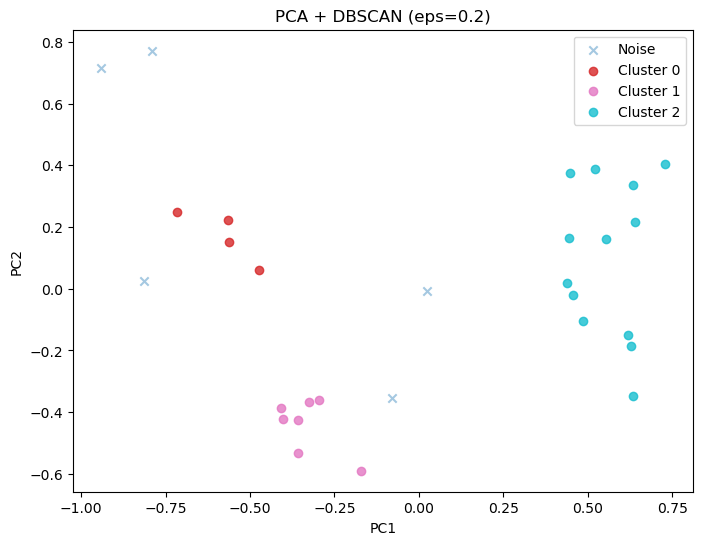

In [62]:
import matplotlib.pyplot as plt
import numpy as np

eps = 0.2  # misal setelah dicoba, ini yang masuk akal
db = DBSCAN(eps=eps, min_samples=3).fit(X_pca)
labels = db.labels_
unique_labels = np.unique(labels)

plt.figure(figsize=(8, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        label_name = "Noise"
        alpha = 0.4
        marker = "x"
    else:
        label_name = f"Cluster {lab}"
        alpha = 0.8
        marker = "o"
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=[col],
        label=label_name,
        alpha=alpha,
        marker=marker
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA + DBSCAN (eps={eps})")
plt.legend()
plt.show()


## hierarchical versi PCA

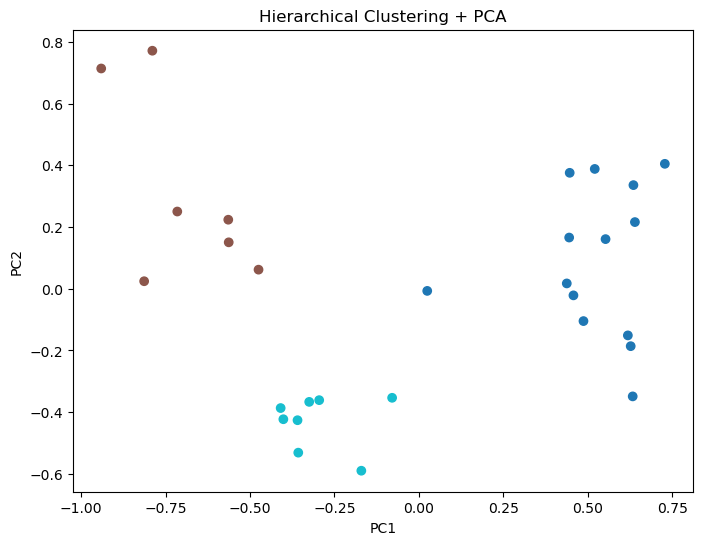

In [64]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Ambil data numerik
X = df_num.values

# 2. PCA ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. Hierarchical clustering (misal mau 3 cluster)
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hc.fit_predict(X_pca)

# 4. Scatter plot hasil clusternya
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clustering + PCA")
plt.show()


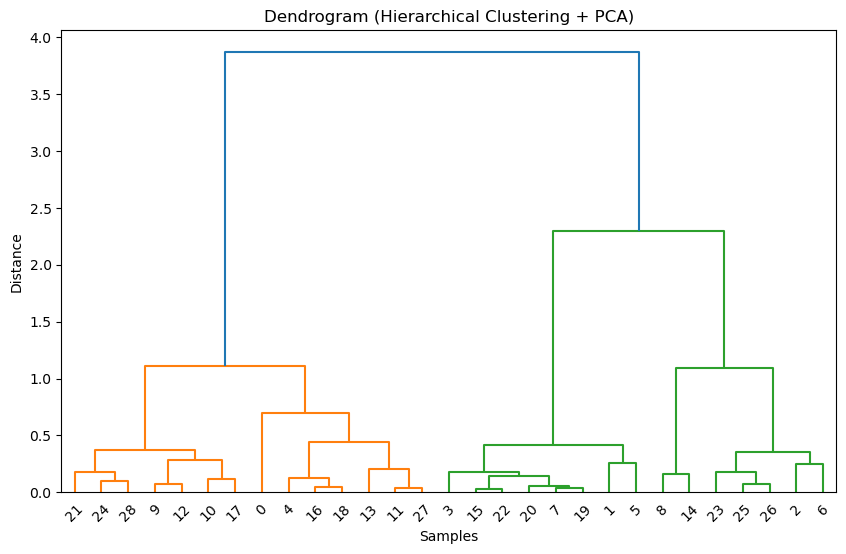

In [65]:
plt.figure(figsize=(10, 6))
Z = linkage(X_pca, method='ward')
dendrogram(Z)
plt.title("Dendrogram (Hierarchical Clustering + PCA)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

## hierarchical non PCA

In [70]:
from sklearn.cluster import AgglomerativeClustering

# X dari data asli (tanpa PCA)
X = df_num.values   # atau X = df_normalized.values kalau itu yang kamu pakai

# Misal mau 3 cluster
hc = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'   # ward = standar buat data numerik
)

labels_hier = hc.fit_predict(X)

# Simpan ke dataframe
df_normalized['cluster_hier_orig'] = labels_hier

print(df_normalized[['Desa', 'cluster_hier_orig']])


            Desa  cluster_hier_orig
0      Balauring                  1
1     Benihading                  1
2           Bour                  2
3       Dikesare                  1
4       Duawutun                  0
5      Dulitukan                  1
6       Hoelea I                  2
7      Ile Kimok                  1
8        Kalikur                  2
9       Katakeja                  0
10     Labalimut                  0
11      Lamatuka                  0
12    Laranwutun                  0
13        Lolong                  0
14         Mahal                  2
15       Merdeka                  1
16       Muruona                  0
17      Nubamado                  0
18          Pada                  0
19      Paubokol                  1
20          Puor                  1
21      Riangbao                  0
22      Tagawiti                  1
23      Todanara                  1
24   Tubuk Rajan                  0
25  Tubungwalang                  2
26       Waienga            

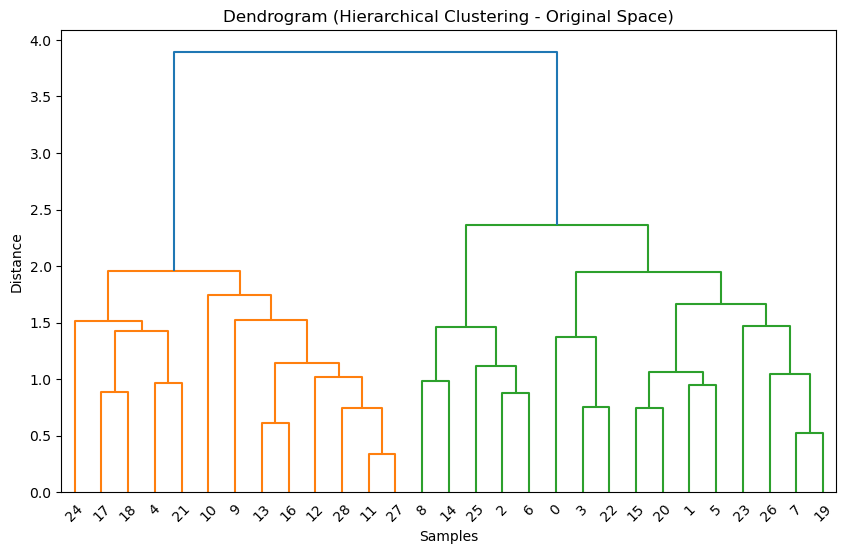

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram (Hierarchical Clustering - Original Space)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [69]:
df_num

,Persentase gaji di atas UMK,Persentase sumber listrik PLN,Persentase air bersih PDAM,"Persentase bangunan rumah bukan ""rumah kecil""",Rata-rata luas lahan (Ha),Rata-rata produksi pertanian (ton),Rata-rata tangkapan ikan (Kg),Persentase petani membeli pupuk,Persentase petani membeli pestisida,Persentase petani menyewa alat pertanian,Persentase kepemilikan ternak,Persentase pembelian obat,Persentase mendapat bantuan dari pemerintah,Persentase terdapat anggota keluarga yang sering sakit
0,0.263158,1.000000,0.766667,0.792806,0.073493,0.008126,1.000000,0.666667,0.111111,0.000000,0.654762,0.272727,0.800000,0.360000
1,1.000000,1.000000,0.000000,0.417266,0.006885,0.009797,0.000000,0.000000,0.074074,0.000000,1.000000,0.545455,0.960000,0.720000
2,0.285714,0.642857,0.000000,0.506680,0.003725,0.036470,0.088326,0.500000,0.833333,0.625000,0.926020,0.389610,0.988571,0.388571
3,0.052632,1.000000,0.000000,0.625899,0.000000,0.348770,0.824373,0.000000,0.000000,0.000000,0.758333,0.090909,0.880000,0.200000
4,0.263158,1.000000,1.000000,0.792806,0.005234,0.101704,0.132616,0.000000,0.000000,0.000000,0.654762,0.000000,0.560000,0.080000
5,0.315789,1.000000,0.166667,0.584173,0.005938,0.030206,0.032258,0.000000,0.000000,0.000000,0.930952,1.000000,0.720000,0.400000
6,0.210526,1.000000,0.000000,0.667626,0.001955,0.010773,0.046595,0.857143,0.571429,0.000000,0.930952,0.272727,1.000000,0.320000
7,0.263158,1.000000,0.000000,0.751079,0.172072,0.124659,0.000000,0.071429,0.535714,0.000000,0.965476,0.090909,0.920000,1.000000
8,0.684211,1.000000,0.000000,0.667626,0.121188,0.257018,0.293907,1.000000,1.000000,0.166667,0.413095,0.545455,0.520000,0.160000
9,0.456706,0.677419,1.000000,0.679740,0.000901,0.000000,0.000000,0.000000,0.333333,1.000000,0.832949,0.967742,0.695484,0.424516
